# Laboratorio 1

Juan Pablo Rodas

Carnet 23007521

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Problema 1

In [14]:
def colorImage(imagen, color):
    alto = imagen.shape[0]
    ancho = imagen.shape[1]
    monocromo = np.zeros((alto,ancho,3))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = imagen[i,j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]

            if (color==1):
                monocromo[i,j] = [0,0,blue]
            elif (color==2):
                monocromo[i,j] = [0,green,0]
            elif (color==3):
                monocromo[i,j] = [red,0,0]
            elif (color==10):
                monocromo[i,j] = [red,green,0]
            elif (color==20):
                monocromo[i,j] = [0,green,blue]
            elif (color==30):
                monocromo[i,j] = [red,0,blue]

    return monocromo

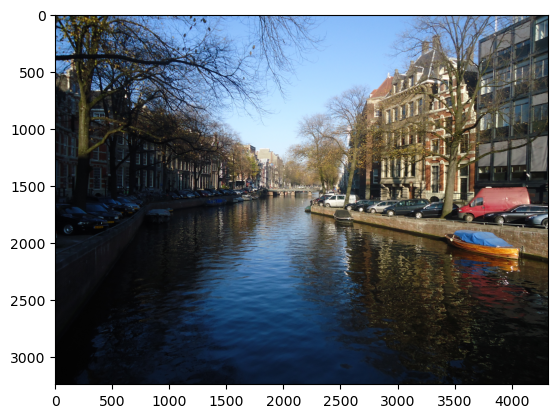

In [9]:
img = cv2.imread("ImagenPrueba.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

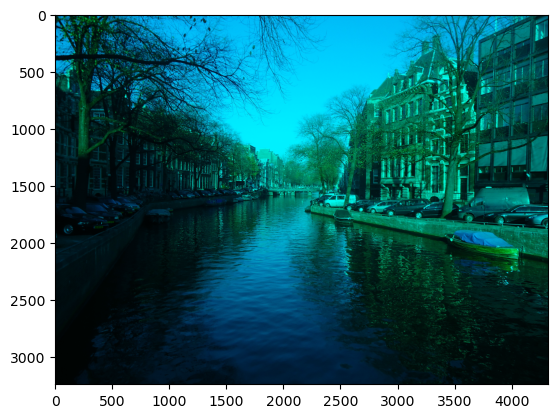

In [18]:
mnc_img2=colorImage(img,20)
cv2.imwrite("monocromo.jpg", mnc_img2)
img2 = cv2.imread("monocromo.jpg")
plt.imshow(img2)
plt.show()

## Problema 2

In [26]:
def reColor(img_red, img_blue, img_green):
    alto = img_red.shape[0]
    ancho = img_red.shape[1]
    recolor = np.zeros((alto,ancho,3))

    for i in range(0, alto):
        for j in range(0, ancho):
            
            blue = img_blue[i,j]
            green = img_green[i,j]
            red = img_red[i,j]

            recolor[i,j]=[red,green,blue]

    return recolor

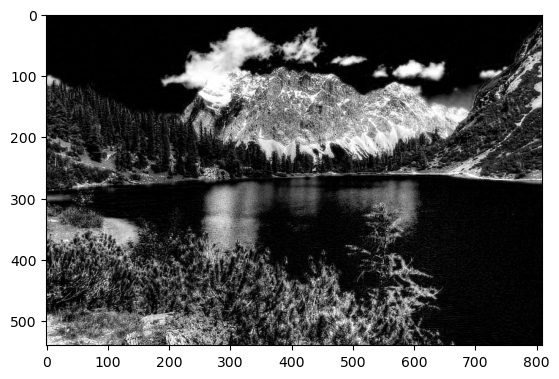

In [34]:
img_red=cv2.imread('Lab1/imagen1/imagen1_salida_gray_rojo.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_red,cmap='gray')
plt.show()

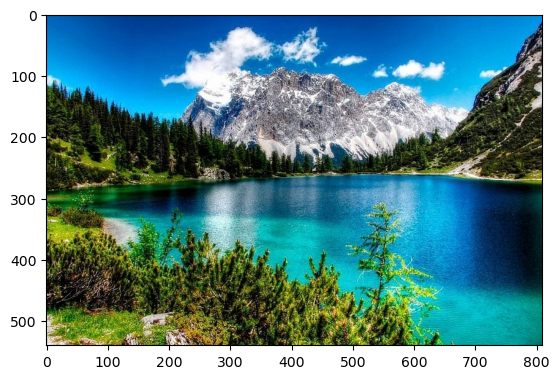

In [31]:
img_red=cv2.imread('Lab1/imagen1/imagen1_salida_gray_rojo.jpg',cv2.IMREAD_GRAYSCALE)
img_blue=cv2.imread('Lab1/imagen1/imagen1_salida_gray_azul.jpg',cv2.IMREAD_GRAYSCALE)
img_green=cv2.imread('Lab1/imagen1/imagen1_salida_gray_verde.jpg',cv2.IMREAD_GRAYSCALE)

imgColor = reColor(img_red, img_blue, img_green)
cv2.imwrite("reColor.jpg", imgColor)
img3 = cv2.imread("reColor.jpg")
plt.imshow(img3)
plt.show()


## Problema 3